In [7]:
import importlib
import copy

import plot_utils
importlib.reload(plot_utils)
import plot_utils as plt

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

# Classification of Ski Area Rankings

<img src="https://static.evo.com/content/travel-guides/id/schweitzer/691398.jpeg" width="800"/>

### Authors: Gabriel Hoing and Sean Cowan

### Class: CPSC 322, Fall 2024

## 1. Introduction

As both of us are avid skiers, we opted to classy a dataset that had ski area 
information.     

Of the available attributes, we opted to classify ski area's based on rating 
because this seemed to be the best attribute to signify how "good" a ski area 
is.  

Our classification was fairly successful with accuracies reaching about 60% 
for Naive Bayes, Random Forest, and Decision Tree classifiers.  

The Naive Bayes classifier edged out the others in accuracy by slight margins.

## 2. Data Analysis

We got the dataset from Kaggle, https://www.kaggle.com/datasets/fhellander/global-ski-resort-rankings-dataset

The dataset we used has 3285 ski areas with the following attributes.   
* rank - integer value that marks the ski area's rank based on rating score
* name - string value that is the name of the ski area
* rating - numerical value that quantifies the quality of the ski area
* url - object that is the url of the ski area's website
* location_coordinate - coordinates of the ski area's location
* location_country - string value that is the country the ski area is located in
* location_region - string value that is the region of the country the ski area is located in 
* elevation_top_m - numerical value that is the height in meters of the high point of the ski area
* elevation_top_difference_m - numerical value that is the difference between highest and lowest point in meters
* total_slope_length_km - numerical value that is the total length of all runs
* number_of_lifts - integer value that is number of lifts
* number_of_slopes - integer value that is the number of runs
* annual_snowfall_cm - numerical value that is the average annual snowfall
* number_of_matches - integer value that has an unknown meaning

We discretized rating into 5 evenly distributed categories...   
"very low", "low", "average", "high", "very high"   
... by calculating each category's percentiles. 

e.g. if x is in "average", then (40th percentile) < x < (60th percentile)

For attributes, we chose to classify on the following...
* elevation_top_m
* elevation_top_difference_m
* total_slope_length_km
* number_of_lifts
* number_of_slopes
* annual_snowfall_cm

Each attribute was discretized into bins to make classification 
easier.

These attributes all intuitively would have some relationship with 
ski restort rating.     
To examine their relationship further, we can examine their correlations with rating.

In [8]:
ski_dataset = MyPyTable().load_from_file("./input_data/ski-resorts.csv")

# exploring different attribute combinations
ski_X = ski_dataset.get_columns(["elevation_top_m", "elevation_difference_m", "total_slope_length_km", "number_of_lifts", "number_of_slopes", "annual_snowfall_cm"])
ski_y = ski_dataset.get_column("rating")

matrix_headers = ["rating", "very high", "high", "average", "low", "very low", "Total", "Recognition (%)"]

discretizer = myutils.discretize_ranking

X_copy = copy.deepcopy(ski_X)
y_copy = copy.deepcopy(ski_y)
for i, row in enumerate(X_copy):
    row[0] = myutils.discretize_elevation(row[0])
    row[1] = myutils.discretize_elevation_difference(row[1])
    row[2] = myutils.discretize_slope_length(row[2])
    row[3] = myutils.discretize_num_lifts(row[3])
    row[4] = myutils.discretize_num_slopes(row[4])
    row[5] = myutils.discretize_snowfall(row[5])
    y_copy[i] = discretizer(y_copy[i])

# correlation coefficients
# elevation_top_m
elev_top = ski_dataset.get_column("elevation_top_m")
etm_corr = myutils.calculate_correlation(ski_y, elev_top)
print("elevation_top_m correlation:", etm_corr)

# elevation_difference_m
elev_diff = ski_dataset.get_column("elevation_difference_m")
edm_corr = myutils.calculate_correlation(ski_y, elev_diff)
print("elevation_difference_m correlation:", edm_corr)

# total_slope_length_km
slope = ski_dataset.get_column("total_slope_length_km")
tslk_corr = myutils.calculate_correlation(ski_y, slope)
print("total_slope_length_km correlation:", tslk_corr)

# number_of_lifts
number_of_lifts = ski_dataset.get_column("number_of_lifts")
number_of_lifts_corr = myutils.calculate_correlation(ski_y, number_of_lifts)
print("number_of_lifts correlation:", number_of_lifts_corr)

# number_of_slopes
number_of_slopes = ski_dataset.get_column("number_of_slopes")
number_of_slopes_corr = myutils.calculate_correlation(ski_y, number_of_slopes)
print("number_of_slopes correlation:", number_of_slopes_corr)

# annual_snowfall_cm
annual_snowfall_cm = ski_dataset.get_column("annual_snowfall_cm")
annual_snowfall_cm_corr = myutils.calculate_correlation(ski_y, annual_snowfall_cm)
print("annual_snowfall_cm correlation:", annual_snowfall_cm_corr)

elevation_top_m correlation: 0.6861473998724411
elevation_difference_m correlation: 0.8769754461110189
total_slope_length_km correlation: 0.736100252878459
number_of_lifts correlation: 0.6881072556036895
number_of_slopes correlation: 0.6357378057195263
annual_snowfall_cm correlation: 0.6718742053727572


Based on the above correlation, the attributes that are the most 
correlated with ski area rating are elevation_difference_m and 
total_slope_length_cm.  
With this in mind, it does seem that every attribute has a fairly large 
correlation coefficient with rating.

### Visualizations

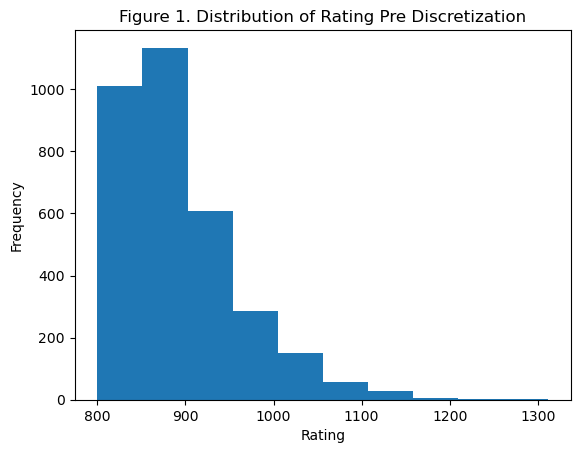

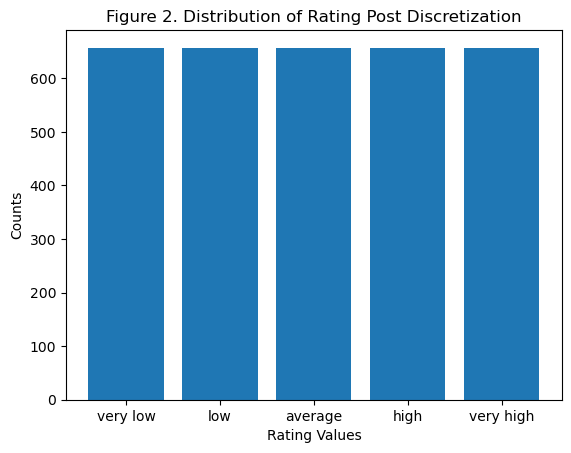

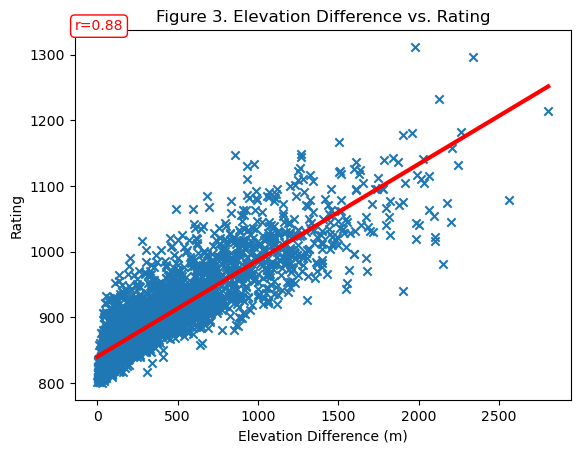

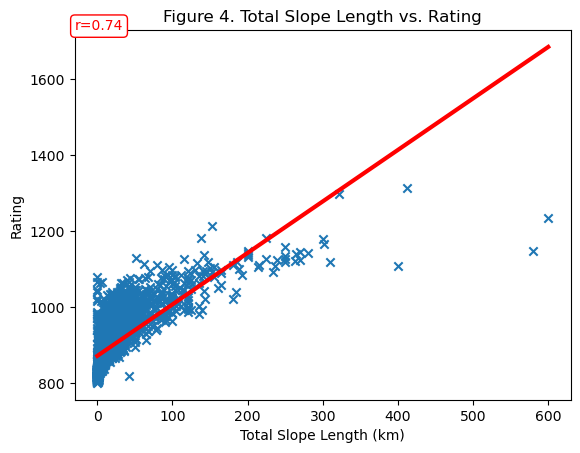

In [9]:
# distribution of rating before discretization
plt.histogram(ski_y, "Figure 1. Distribution of Rating Pre Discretization", \
              "Rating", "Frequency")

# distribution of rating after discretization
display_order = [4, 2, 0, 1, 3]

values, counts = myutils.get_frequencies(y_copy)
ordered_values = [values[i] for i in display_order]
ordered_counts = [counts[i] for i in display_order]

plt.bar_chart(ordered_values, ordered_counts, "Figure 2. Distribution of Rating Post Discretization", \
              "Rating Values", "Counts")

# scatter plot of rating vs elevation_difference_m
m, b = myutils.compute_slope_intercept(elev_diff, ski_y)
plt.linear_regression(elev_diff, ski_y, m, b, "Figure 3. Elevation Difference vs. Rating", \
                     "Elevation Difference (m)", "Rating")

# scatter plot of rating vs total_slope_length_km
m, b = myutils.compute_slope_intercept(slope, ski_y)
plt.linear_regression(slope, ski_y, m, b, "Figure 4. Total Slope Length vs. Rating", \
                     "Total Slope Length (km)", "Rating")

#### Figure 1.
Figure 1 shows the distribution of rating before the data is discretized. 
From this histogram, we can see that there is a right skew in the data. 
This means more ski areas have average to low ratings.  
Rather than discretize on even widths, which will produce make a lot of resorts 
be in low rating bins, we can discretize based on percentiles.  
This produces the even distribution seen in Figure 2.   
Something to keep in mind when we get results is that the bin that corresponds 
with highly rated ski areas will have a much wider scope of ratings than the other bins.    
This is important because it could have effects on the predicted rating.    
Intuitively this would cause the predictions to be more likely highly rated.

#### Figure 2.
Figure 2 shows how rating values are discretized into evenly distributed "bins"
so classification is possible.

#### Figure 3.
Figure 3 is a scatter plot with a fitted linear regression line. Elevation Difference was 
the most correlated attribute with rating and the linear regression line seems to fit well. 

#### Figure 4.
Figure 4 is a scatter plot with a fitten linear regression line. The relationship between 
total slope length and rating seems more logarithmic than linear which might be something 
to explore in the future.

# 3. Classification Results

## Dummy Classification

In [10]:
dummy_clf = MyDummyClassifier()
dummy_actual, dummy_pred, dummy_accuracy, dummy_error = myevaluation.display_cross_val(X_copy, y_copy, dummy_clf, matrix_headers)

Accuracy: 0.19792935444579782, Error Rate: 0.8020706455542022

rating       very high    high    average    low    very low    Total    Recognition (%)
---------  -----------  ------  ---------  -----  ----------  -------  -----------------
very high            0     198        264    195           0      657                  0
high                 0     195        264    198           0      657                 29
average              0     198        260    198           0      656                 39
low                  0     198        264    195           0      657                 29
very low             0     195        264    198           0      657                  0


## kNN Classification

In [11]:
knn_clf = MyKNeighborsClassifier(categorical=True)
knn_actual, knn_pred, knn_actual, knn_error = myevaluation.display_cross_val(X_copy, y_copy, knn_clf, matrix_headers)

Accuracy: 0.42752740560292324, Error Rate: 0.5724725943970768

rating       very high    high    average    low    very low    Total    Recognition (%)
---------  -----------  ------  ---------  -----  ----------  -------  -----------------
very high          580      68          9      0           0      657                 88
high               267     272        101     14           3      657                 41
average             77     243        255     74           7      656                 38
low                  4     111        285    224          33      657                 34
very low             1      43        118    422          73      657                 11


## Naive Bayes Classification

In [12]:
nb_clf = MyNaiveBayesClassifier()
nb_actual, nb_pred, nb_accuracy, nb_error = myevaluation.display_cross_val(X_copy, y_copy, nb_clf, matrix_headers)

Accuracy: 0.6029232643118149, Error Rate: 0.39707673568818513

rating       very high    high    average    low    very low    Total    Recognition (%)
---------  -----------  ------  ---------  -----  ----------  -------  -----------------
very high          535      99         18      0           5      657                 81
high               141     318        145     35          18      657                 48
average             13     179        287    159          18      656                 43
low                  0       9        159    316         173      657                 48
very low             1       0         10    122         524      657                 79


## Decision Tree Classification

In [13]:
tree_clf = MyDecisionTreeClassifier()
tree_actual, tree_pred, tree_accuracy, tree_error = myevaluation.display_cross_val(X_copy, y_copy, tree_clf, matrix_headers)

Accuracy: 0.6001827040194885, Error Rate: 0.3998172959805115

rating       very high    high    average    low    very low    Total    Recognition (%)
---------  -----------  ------  ---------  -----  ----------  -------  -----------------
very high          539      95         18      5           0      657                 82
high               109     344        143     48          13      657                 52
average             15     162        236    207          36      656                 35
low                  4      17         92    383         161      657                 58
very low             1       1          4    182         469      657                 71


## Random Forest Classification

In [14]:
forest_clf = MyRandomForestClassifier(50, 3, 4)
forest_actual, forest_pred, forest_accuracy, forest_error = myevaluation.display_cross_val(X_copy, y_copy, forest_clf, matrix_headers)

Accuracy: 0.5834348355663824, Error Rate: 0.4165651644336176

rating       very high    high    average    low    very low    Total    Recognition (%)
---------  -----------  ------  ---------  -----  ----------  -------  -----------------
very high          504     132         17      4           0      657                 76
high               104     383        110     47          13      657                 58
average              4     198        220    198          36      656                 33
low                  0      23        113    334         187      657                 50
very low             1       0          6    175         475      657                 72


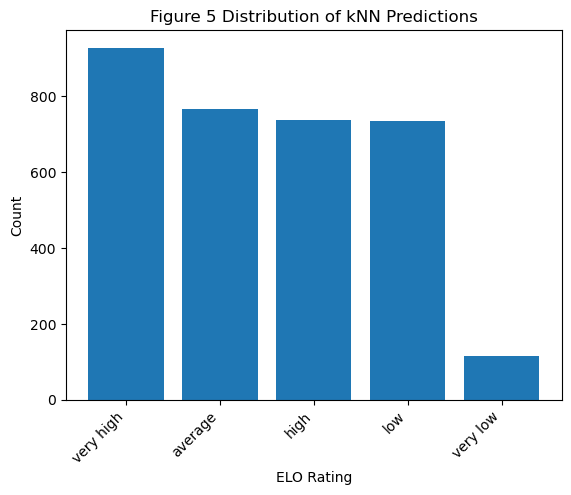

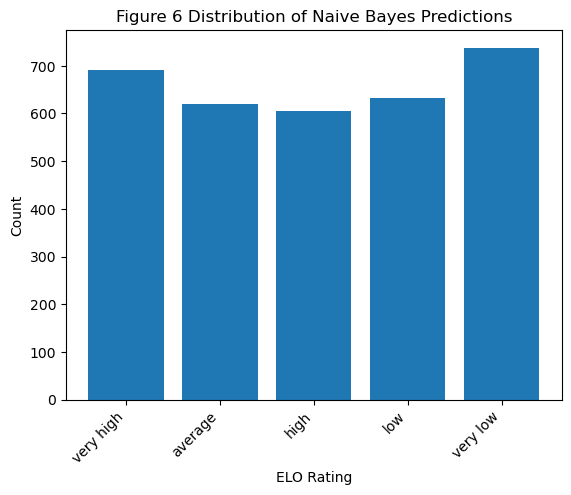

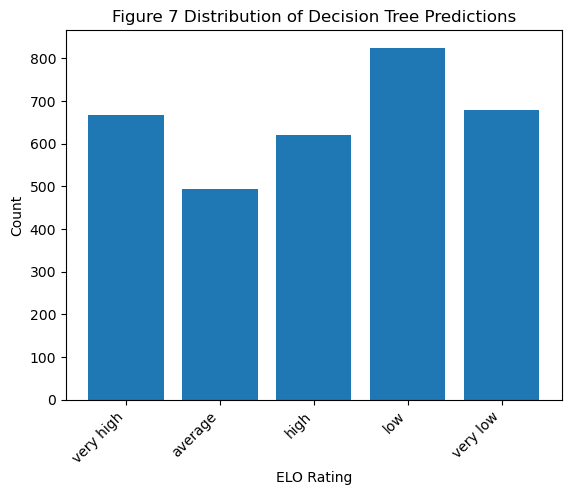

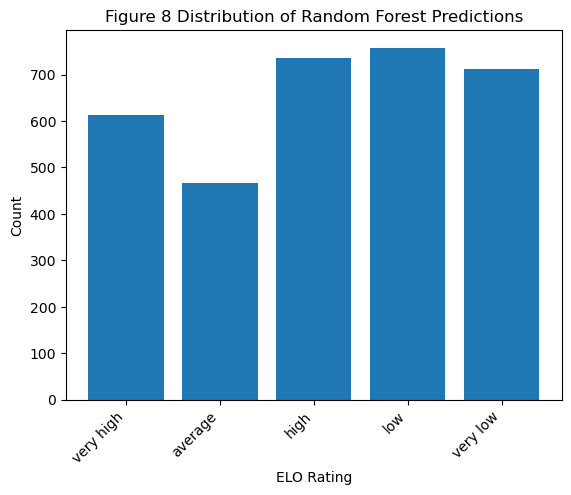

In [15]:
myevaluation.display_distributions(knn_pred, "kNN",  "5")
myevaluation.display_distributions(nb_pred, "Naive Bayes", "6")
myevaluation.display_distributions(tree_pred, "Decision Tree", "7")
myevaluation.display_distributions(forest_pred, "Random Forest", "8")

For this dataset, we created 5 classifiers. These is a dummy classifier,
a kNN classifier, a Naive Bayes classifier, a decision tree classifier, 
and a random forest classifier.

Each classifier has its accuracy calculated using 10 stratified kfold splits
so our measures are more accurate. Accuracy is calculated based on the following 
equation:

$$\frac{y_{correctly predicted}}{y_{correctly predicted} + y_{incorrectly predicted}} $$

#### Dummy Classifier Results
The dummy classifier is used as a baseline for accuracy. The basic idea of 
this algorithm is that the most common class is chosen as a prediction.
As shown above, it has an accuracy of 19.8%. Basically, if the other classifiers have an
accuracy better than 19.8%, we can conclude that the models are "learning"
from the data to make more accurate predictions.

#### kNN Classifier Results
The kNN algorithm makes predictions based on the classes of the "closest" 
instances in the training dataset. For this dataset, which used categorical data, 
the metric used to measure distance is that distance = 0 if attributes match and 
distance = 1 if not. This can impact the accuracy of the classifier.
The kNN classifier ends up with an accuracy of 42.8%. That is a 24% increase in accuracy 
compared to the dummy classifier, so the model is learning from the data.   
This is a great improvement. From Figure 5, we can see that the kNN classifier 
tends towards predicting ratings that are higher than their actual rating. 
This could be due to the much wide range of rating values in the higher rating
bins as discussed in the data analysis section.

#### Naive Bayes Classifier Results
The Naive Bayes classifier has an accuracy of 60.2%. This is the model that 
performed the best on this dataset. It also has the most even distribution of 
predicted ski area ratings. Interestinly, when examining Figure 6, we can see
that Naive Bayes tends to predict ski area ratings that are more on the extremes
(e.g. very high and very low).

#### Decision Tree Classifier Results
The decision tree classifier has an accuracy of 60%. This makes it very similar 
to the Naive Bayes classifier in terms of accuracy, but it has a different 
distribution of predicted ratings. The distribution, in Figure 7, seems to be more 
randomly distributed with the "low" category getting the most predictions, and the
"very high" and "very low" getting the next most. 

#### Random Forest Classifier Results
The random forest classifier is created using mutiple models within the classifier
to get better generalizations about the data. This classifier has an accuracy of 58.3%
which is similar to the Naive Bayes and the decision tree classifiers. It tends toward
predicting values on the lower end of rating interestingly.

#### Classifier Performance Metric
We believe that accuracy is the best metric for classifier performance in this case, 
but accuracy does have its flaws. We thought it would be hard to analyze binary metrics
on this dataset since there is 5 possible classes. Accuracy should also be a fairly good
metric since the classes are evenly distributed. This means that there shouldn't be classes
that are underrepresented based on the accuracy metric.     

# 4. Classification web app

To use our web app, click on the following link:    
https://cpsc322-finalproject-1.onrender.com/    
To properly use this web app, enter in all of your favorite ski area's statistics
and the app will provide a prediction as to its rating.

# 5. Conclusion

In conclusion, we seem to have very good results from our classifiers. There is still room for improvement, 
we believe that classification would be more accurate if it included attributes that take into account
more human related factors.     
This could include amount of people near by, accessability of the ski area, region, and type of terrain.        
In the future, we would consider looking more closely at the relationship between rating and each attribute, 
and consider that some attributes might have a non linear relationship with rating.

# 6. Acknowledgements
We would like to thank and acknowledge some sources that helped make this project possible.     
First, we want to acknowledge kaggle for providing our dataset:     
https://www.kaggle.com/datasets/fhellander/global-ski-resort-rankings-dataset   
We also want to thank Dr. Sprint for providing starter code. We could not have done it without you!     
Lastly, we want to acknowledge that chatgpt helped solve some problems with debugging.